In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
DIRECTORY = r'C:\Users\balajiam\Documents\ML Data Analysis\Pneumonia Prediction\chest_xray\chest_xray'
FOLDERS = ['test', 'train', 'val']

CLASS = ['NORMAL','PNEUMONIA']

In [3]:
test_data = []
train_data = []
val_data = []

for folder in FOLDERS:
    folder_path = os.path.join(DIRECTORY, folder)
    for classification in CLASS:
        image_path = os.path.join(folder_path, classification)
        for image in os.listdir(image_path):
            try:
                image_url = os.path.join(image_path,image)
                arr = cv2.imread(image_url)
                arr = cv2.resize(arr, (100, 100))
                label = CLASS.index(classification)
                if folder == 'train':
                    train_data.append([arr, label])
                elif folder == 'test':
                    test_data.append([arr, label])
                else:
                    val_data.append([arr, label])
            except Exception as e:
                print(e)

OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



In [4]:
len(test_data)

624

In [5]:
len(train_data)

5216

In [6]:
len(val_data)

16

In [7]:
import random

random.shuffle(train_data)

In [8]:
X = []
y = []

for feature, label in train_data:
    X.append(feature)
    y.append(label)

In [9]:
X = np.array(X)
y = np.array(y)

In [10]:
X.shape

(5216, 100, 100, 3)

In [11]:
y.shape

(5216,)

In [12]:
X = X.reshape(-1, 100, 100, 3)

In [13]:
X.shape

(5216, 100, 100, 3)

In [14]:
X = X/255

In [15]:
import pickle

pickle.dump(X, open('X.pkl', 'wb'))
pickle.dump(y, open('y.pkl', 'wb'))

In [16]:
X.shape[1:]

(100, 100, 3)

In [17]:
import keras 

Using TensorFlow backend.


In [18]:
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [19]:
from keras.models import Sequential

In [27]:
model = Sequential()

In [28]:
#CONV Layer1
model.add(Conv2D(100,(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))
#CONV Layer2
model.add(Conv2D(100,(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))
#CONV Layer3
model.add(Conv2D(100,(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))
#CONV Layer4
model.add(Conv2D(100,(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))
#FLATTERN
model.add(Flatten())
#DENSE LAYER
model.add(Dense(256, input_shape = X.shape[1:], activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
#O/P LAYER
model.add(Dense(2, activation = 'sigmoid'))
#COMPILE
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
graph = model.fit(X,y, epochs = 8, batch_size = 30, validation_split = 0.1)

Train on 4694 samples, validate on 522 samples
Epoch 1/8
4694/4694 [==============================] - 271s 58ms/step - loss: 0.4623 - accuracy: 0.7929 - val_loss: 0.3536 - val_accuracy: 0.8448
Epoch 2/8
4694/4694 [==============================] - 277s 59ms/step - loss: 0.1896 - accuracy: 0.9265 - val_loss: 0.1211 - val_accuracy: 0.9540
Epoch 3/8
4694/4694 [==============================] - 277s 59ms/step - loss: 0.1288 - accuracy: 0.9508 - val_loss: 0.0960 - val_accuracy: 0.9655
Epoch 4/8
4694/4694 [==============================] - 270s 58ms/step - loss: 0.0983 - accuracy: 0.9621 - val_loss: 0.1142 - val_accuracy: 0.9636
Epoch 5/8
4694/4694 [==============================] - 272s 58ms/step - loss: 0.0785 - accuracy: 0.9708 - val_loss: 0.1113 - val_accuracy: 0.9674
Epoch 6/8
4694/4694 [==============================] - 275s 59ms/step - loss: 0.0683 - accuracy: 0.9749 - val_loss: 0.0987 - val_accuracy: 0.9713
Epoch 7/8
4694/4694 [==============================] - 273s 58ms/step - loss:

#### 'accuracy', 'loss', 'val_accuracy', 'val_loss'
#### These are the metrics that we can track and visualize using matplotlib

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

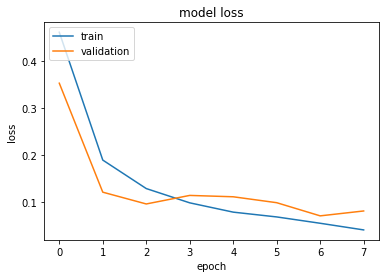

In [30]:
plt.plot(graph.history['loss'])
plt.plot(graph.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

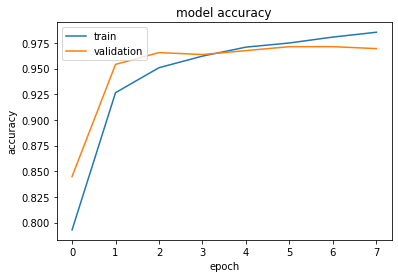

In [31]:
plt.plot(graph.history['accuracy'])
plt.plot(graph.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [32]:
model.save('pnemonia_prediction.model')